In [2]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

sys.path.append('/Users/etmu9498/research/code/scripts/statistics')
import cloud_height_pdfs_all_one_figure

In [3]:
# binning test


TC Fred
Number of crl files: 7

TC Fred, 08-12-am, Eye Pass 1
TC Fred, 08-12-am, Eye Pass 2
TC Fred, 08-12-am, Eye Pass 3
TC Fred, 08-12-pm, Eye Pass 1
TC Fred, 08-12-pm, Eye Pass 2
TC Fred, 08-13, Eye Pass 1
TC Fred, 08-13, Eye Pass 2

TC Grace
Number of crl files: 11

TC Grace, 08-16, Eye Pass 1
TC Grace, 08-16, Eye Pass 2
TC Grace, 08-17, Eye Pass 1
TC Grace, 08-17, Eye Pass 2
TC Grace, 08-17, Eye Pass 3
TC Grace, 08-18, Eye Pass 1
TC Grace, 08-18, Eye Pass 2
TC Grace, 08-18, Eye Pass 3
TC Grace, 08-19, Eye Pass 1
TC Grace, 08-19, Eye Pass 2
TC Grace, 08-19, Eye Pass 3

TC Henri
Number of crl files: 5

TC Henri, 08-20, Eye Pass 1
TC Henri, 08-20, Eye Pass 3
TC Henri, 08-21, Eye Pass 1
TC Henri, 08-21, Eye Pass 2
TC Henri, 08-21, Eye Pass 3

TC Ida
Number of crl files: 5

TC Ida, 08-27, Eye Pass 1
TC Ida, 08-27, Eye Pass 2
TC Ida, 08-27, Eye Pass 3
TC Ida, 08-27, Eye Pass 7
TC Ida, 08-29, Eye Pass 1

TC Sam
Number of crl files: 7

TC Sam, 09-26, Eye Pass 1
TC Sam, 09-26, Eye Pass 2


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


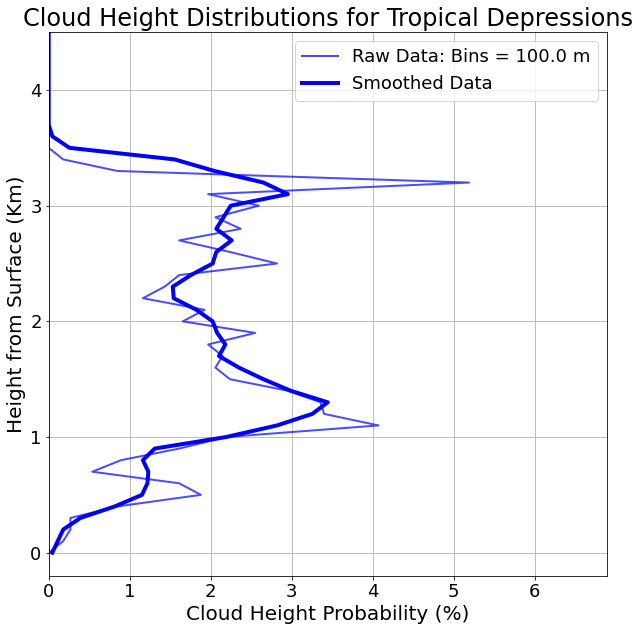

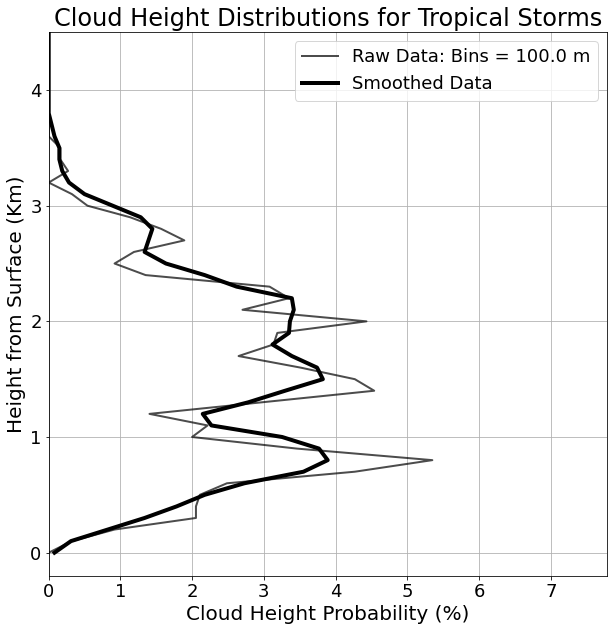

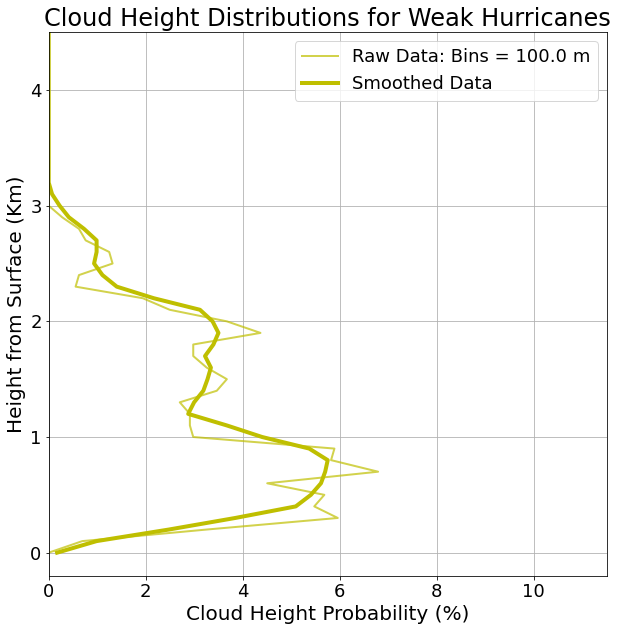

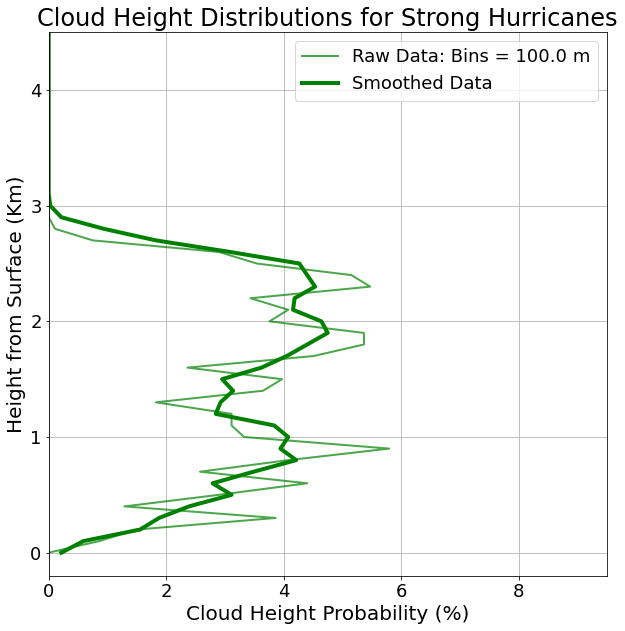

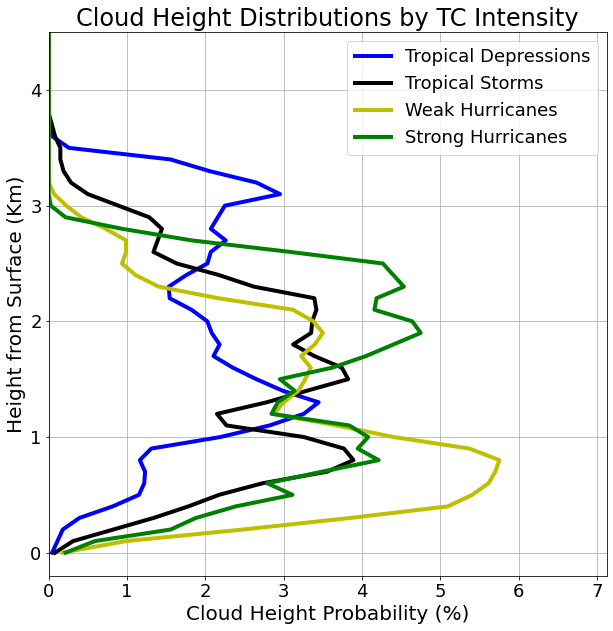

In [7]:
cloud_height_pdfs_all_one_figure.cloud_height_vs_intensity( binwidth=.1, poster_case=True, lw=4, manual_bins=True, smoothwidth=4) # using .025, other options: .175, .3, 1.0

In [ ]:
# smoothing test

In [7]:
def in_situ_to_float( return_var):
    return_var_temp = np.zeros( len( return_var))
    for line_ind in range( len( return_var)):
        if return_var[ line_ind] == '':
            return_var_temp[line_ind] = np.nan
        else:
            return_var_temp[ line_ind] = float( return_var[ line_ind])
    return return_var_temp

In [8]:
# smoothing script- identical to the pandas code as long as center = True in the rolling() function!

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


In [9]:
# load and test data
os.chdir("/Users/etmu9498/research/data/in-situ-new")

# data = xr.open_dataset('in-situ-grace-08-16-eye-1.nc')
data = xr.open_dataset('in-situ-sam-09-27-eye-2.nc')

print( len( data.time))
print( len( data['PSURF.d']))

print( type( data.time[ 1000].values))
print( data.time[ 1000].values)

print( type( data['PSURF.d'][ 1000].values))
print( data['PSURF.d'][ 1000].values)

32852
32852
<class 'numpy.ndarray'>
18.448888888888888
<class 'numpy.ndarray'>
1013.75


time converted
psurf converted


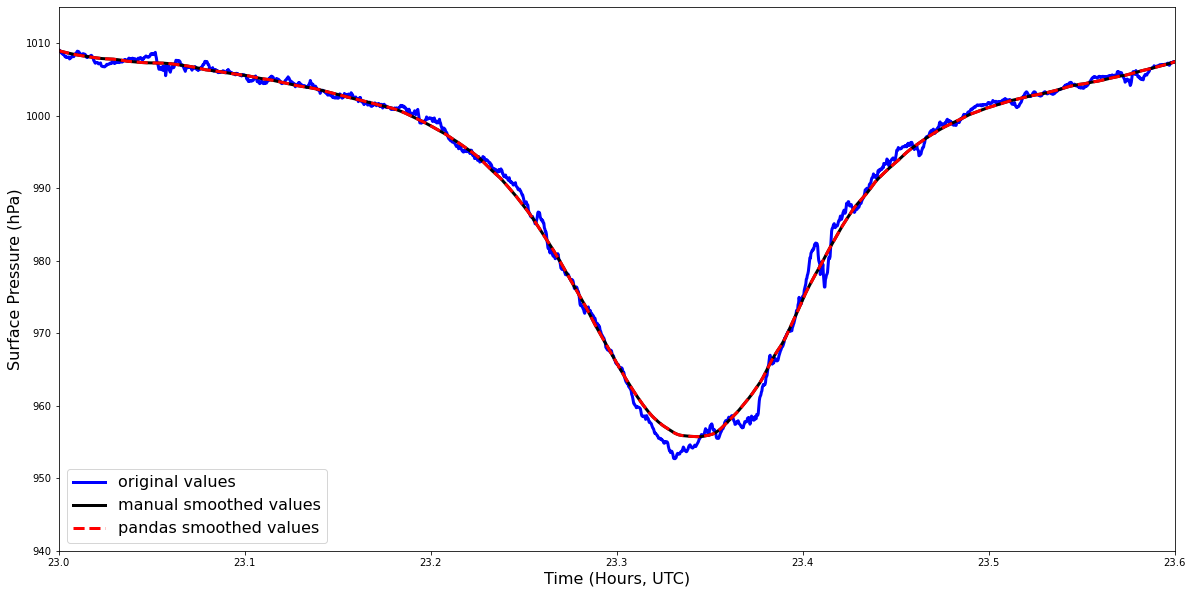

In [17]:
lim1 = 15000 # 15000
lim2 = 20000 # 17500
window = 180 # 30 in seconds
fs = 16

time = in_situ_to_float( data.time[lim1 : lim2])
print('time converted')

psurf = in_situ_to_float( data['PSURF.d'][lim1 : lim2])

psurf_avg = pd.Series( psurf).rolling(window=window, min_periods=1, center=True).mean()
# psurf_avg = pd.Series( psurf).ewm(span=window).mean()
print('psurf converted')


# find a smoothed dataset using zhien's method!
psurf_newavg = smooth( psurf, window)

plt.figure(figsize=(20, 10))
plt.plot( time, psurf, c='b', label='original values', linewidth=3)

plt.plot( time, psurf_newavg, c='k', label='manual smoothed values', linewidth = 3)
plt.plot( time, psurf_avg, c='r', label='pandas smoothed values', linestyle = '--', linewidth=3)

plt.legend(fontsize=fs)

# plt.title( "Surface Pressure Values for TC Sam, 09/27 Eye Pass 2", fontsize=fs)

plt.xlim([23.0, 23.6])
plt.ylim( [940, 1015])

# plt.xlim( [10.75, 11.3])
# plt.ylim( [990, 1015])
# plt.title( "Surface Pressure Values for TC Grace, 08/16 Eye Pass 1", fontsize=fs)

plt.xlabel( 'Time (Hours, UTC)', fontsize=fs)
plt.ylabel( 'Surface Pressure (hPa)', fontsize=fs)

# save fig for presentation bc resolution is bad :/
os.chdir("/Users/etmu9498/research/figures/random")
plt.savefig("psurf-avg-example.png", dpi=300)